In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from my_utils import load_data
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [3]:
# Load the prepared data

# X : normalized and one-hot encoded data
# user_df: unnormalized data
X, session_df, requests_df = load_data(csv_path='output.log', req_thres=5, normalize_feat=True)
X

LOADING THE DATASET...


Skipping line 601729: Expected 7 fields in line 601729, saw 23. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.


DATASET HAS BEEN LOADED SUCESSFULLY!


requests_count  \
ip            user_agent                                                           
1.81.122.235  Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Ma...       -0.095735   
10.92.2.8     Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-A...       -0.031429   
100.92.35.41  Mozilla/5.0 (Linux; Android 9; SM-A205F) AppleW...       -0.080424   
102.0.232.185 Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...       -0.068175   
102.0.232.220 Mozilla/5.0 (Linux; Android 11; SM-A505F) Apple...       -0.074299   
...                                                                          ...   
99.239.78.14  Mozilla/5.0 (MSIE 10.0; Windows NT 6.1; WOW64; ...       -0.095735   
              Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...       -0.074299   
              Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...       -0.049802   
              Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleW...       -0.052864   
99.239.97.147 Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89...        0.581013   

                                                                  path_length_std  \
ip            user_agent                                                            
1.81.122.235  Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Ma...         0.000000   
10.92.2.8     Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-A...         0.507875   
100.92.35.41  Mozilla/5.0 (Linux; Android 9; SM-A205F) AppleW...         0.834847   
102.0.232.185 Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...         0.516398   
102.0.232.220 Mozilla/5.0 (Linux; Android 11; SM-A505F) Apple...         0.267261   
...                                                                           ...   
99.239.78.14  Mozilla/5.0 (MSIE 10.0; Windows NT 6.1; WOW64; ...         0.377964   
              Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...         0.267261   
              Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...         0.394771   
              Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleW...         0.358569   
99.239.97.147 Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89...         0.519427   

                                                                  4xx_percentage(%)  \
ip            user_agent                                                              
1.81.122.235  Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Ma...          -0.102574   
10.92.2.8     Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-A...          -0.102574   
100.92.35.41  Mozilla/5.0 (Linux; Android 9; SM-A205F) AppleW...          -0.102574   
102.0.232.185 Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...          -0.102574   
102.0.232.220 Mozilla/5.0 (Linux; Android 11; SM-A505F) Apple...          -0.102574   
...                                                                             ...   
99.239.78.14  Mozilla/5.0 (MSIE 10.0; Windows NT 6.1; WOW64; ...           4.224926   
              Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...          -0.102574   
              Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...          -0.102574   
              Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleW...          -0.102574   
99.239.97.147 Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89...           0.030288   

                                                                  3xx_percentage(%)  \
ip            user_agent                                                              
1.81.122.235  Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Ma...          -0.718296   
10.92.2.8     Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-A...          -0.718296   
100.92.35.41  Mozilla/5.0 (Linux; Android 9; SM-A205F) AppleW...          -0.718296   
102.0.232.185 Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...          -0.718296   
102.0.232.220 Mozilla/5.0 (Linux; Android 11; SM-A505F) Apple...          -0.718296   
...                                                                             ...   
99.239.78.14  Mozilla/5.0 (MSIE 10.0; W

In [42]:
cols = X.columns[:15]

X = X[cols]
X

,ip,user_agent,requests_count,path_length_std,4xx_percentage(%),3xx_percentage(%),HEAD_count(%),image_count(%),total_response_length,mean_response_length,total_response_time,mean_response_time,avg_path_count_norm,is_bot,is_pc
0,1.81.122.235,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,-0.095735,0.000000,-0.102574,-0.718296,-0.018601,-1.602867,-0.008371,0.854435,-0.085963,-0.148376,0.002439,False,False
1,10.92.2.8,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,-0.031429,0.507875,-0.102574,-0.718296,-0.018601,0.033177,-0.003628,0.186140,-0.085809,-0.148742,0.725792,False,False
2,100.92.35.41,Mozilla/5.0 (Linux; Android 9; SM-A205F) Apple...,-0.080424,0.834847,-0.102574,-0.718296,-0.018601,-1.602867,-0.004768,0.765010,-0.085954,-0.148722,0.879623,False,False
3,102.0.232.185,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,-0.068175,0.516398,-0.102574,-0.718296,-0.018601,-1.602867,-0.014490,-0.343457,0.398518,1.708325,1.435493,False,True
4,102.0.232.220,Mozilla/5.0 (Linux; Android 11; SM-A505F) Appl...,-0.074299,0.267261,-0.102574,-0.718296,-0.018601,0.442187,-0.008088,0.282094,-0.085995,-0.148986,1.739906,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31536,99.239.78.14,Mozilla/5.0 (MSIE 10.0; Windows NT 6.1; WOW64;...,-0.095735,0.377964,4.224926,-0.718296,-0.018601,0.033177,-0.011700,0.204127,-0.085982,-0.148543,0.340998,False,True
31537,99.239.78.14,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,-0.074299,0.267261,-0.102574,1.774162,-0.018601,0.442187,-0.014089,-0.303955,-0.086031,-0.149146,1.892610,False,True
31538,99.239.78.14,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,-0.049802,0.394771,-0.102574,-0.718296,-0.018601,0.999930,-0.006803,0.133794,-0.085995,-0.149105,1.351409,False,True
31539,99.239.78.14,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,-0.052864,0.358569,-0.102574,-0.718296,-0.018601,1.123872,-0.006968,0.145879,-0.086005,-0.149125,1.414657,False,True


In [5]:
session_df.reset_index(inplace=True)
X.reset_index(inplace=True)

In [7]:
#X.drop(columns=['anomaly'], inplace=True)

# 1. IsolationForest

In [43]:
to_model_cols = X.columns[2:]

if_model = IsolationForest(bootstrap=False,
                     #bootstrap: randomly re-sample initial sample with replacement
                     contamination=float(.12),
                     #contamination: % of outliers (if known), no effect on score
                     max_features=1.0,
                     #max_features: # of randomly selected features at each node
                     max_samples='auto',
                     #max_samples: # of samples to draw from the initial samples 
                     #for each tree
                     n_estimators=200,
                     #n_estimators: # of trees in the forest
                     n_jobs=-1,
                     #n_jobs: # of cores used for parallelization, -1 means max available
                     random_state=42,
                     #random_state: sets the seed for reproducibility
                     verbose=0,
                     #verbose: control the verbosity of the output
                     warm_start=False)
                     #warm_start: reuse the solution from the previous call 
                     #and add more trees to the old ensemble
        
if_model.fit(X[to_model_cols])

y_pred = if_model.predict(X[to_model_cols])
y_score = if_model.decision_function(X[to_model_cols])
X['anomaly'] = y_pred

# result dataframe with columns : score and prediction
result_df = pd.DataFrame(if_model.decision_function(X[to_model_cols]), 
            columns=['score'])
result_df['prediction'] = y_pred

outliers = X.loc[X['anomaly'] == -1]
inliers = X.loc[X['anomaly'] == 1]

outlier_index = list(outliers.index)
inlier_index = list(inliers.index)

print(X['anomaly'].value_counts())
print("Note: -1 indicates anomaly")

 1    27756
-1     3785
Name: anomaly, dtype: int64
Note: -1 indicates anomaly


In [44]:
anomalies = session_df.loc[X.loc[X['anomaly'] == -1].index]
non_anomalies = session_df.loc[X.loc[X['anomaly'] == 1].index]


print("Number of anomalies with is_bot == True: {}".format(len(anomalies[anomalies['is_bot'] == True])))
print("Number of non-anomalies with is_bot == True: {}".format(len(non_anomalies[non_anomalies['is_bot'] == True])))

Number of anomalies with is_bot == True: 614
Number of non-anomalies with is_bot == True: 1


In [45]:
result_df[result_df['score'] < 0]

,score,prediction
3,-0.044017,-1
9,-0.221448,-1
16,-0.072615,-1
17,-0.186105,-1
21,-0.065090,-1
...,...,...
31525,-0.015522,-1
31526,-0.000947,-1
31527,-0.003317,-1
31536,-0.062726,-1


<AxesSubplot:>

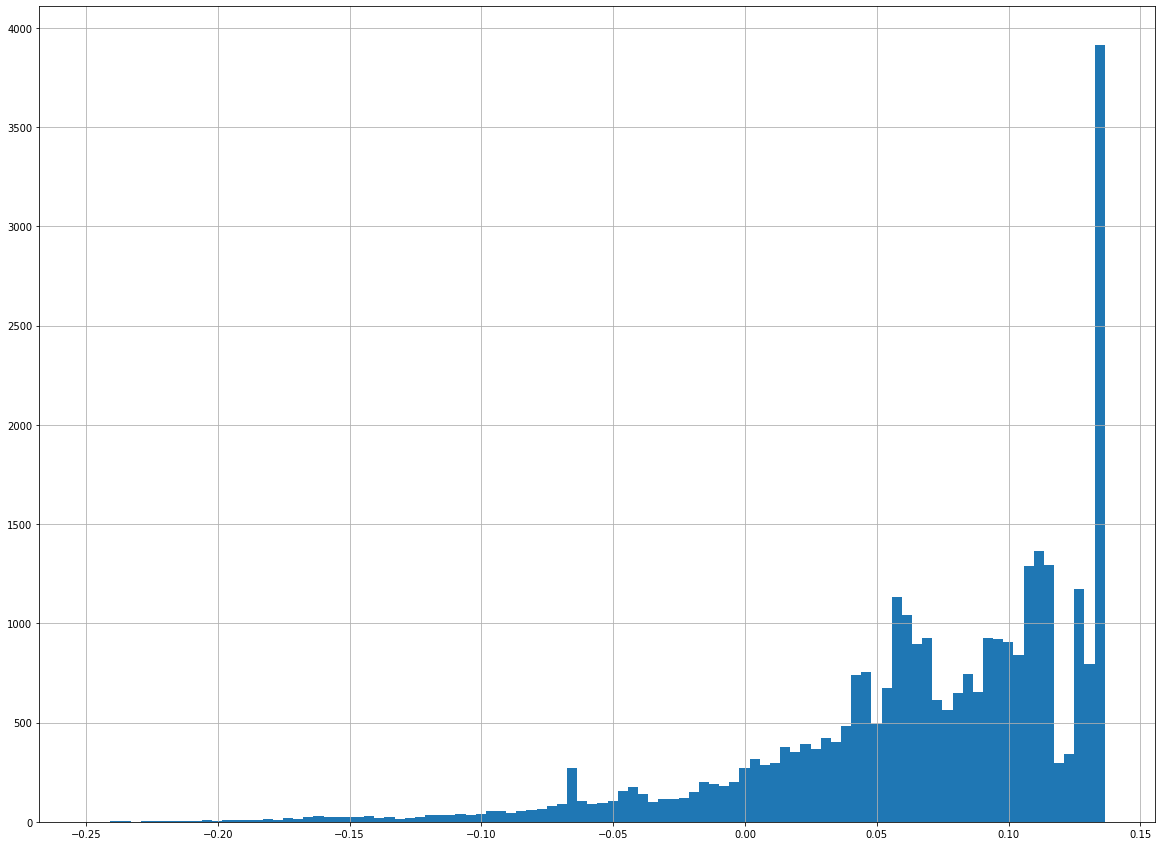

In [46]:
result_df['score'].hist(bins=100, figsize=(20,15))

To see the requests for each session you need to change the *my_utils* python file.

In [59]:
top_anomalies = session_df.loc[result_df[result_df['prediction'] == -1].sort_values(['score'], ascending=True).index]
top_non_anomalies = session_df.loc[result_df[result_df['prediction'] == 1].sort_values(['score'], ascending=False).index]

ip = top_non_anomalies.iloc[-6].ip
ua = top_non_anomalies.iloc[-6].user_agent

requests_df[(requests_df['ip'] == ip) & (requests_df['user_agent'] == ua)].sort_values('time_stamp', ascending=True).head(20)


,ip,time,method,status_code,path,response_length,user_agent,response_time,path_count_normalized,path_length,time_stamp
589097,35.40.184.150,2021-05-12 11:41:42+04:30,Get,200,images/gadgets/join_pros3.jpg,34053,Mozilla/5.0 (Linux; Android 8.1.0; SM-J260F Bu...,16.0,1.47543,3,1620803502
592704,35.40.184.150,2021-05-12 11:43:10+04:30,Get,304,images/gadgets/join_pros3.jpg,0,Mozilla/5.0 (Linux; Android 8.1.0; SM-J260F Bu...,16.0,1.47543,3,1620803590
593462,35.40.184.150,2021-05-12 11:43:25+04:30,Get,304,images/gadgets/join_pros3.jpg,0,Mozilla/5.0 (Linux; Android 8.1.0; SM-J260F Bu...,8.0,1.47543,3,1620803605
595028,35.40.184.150,2021-05-12 11:43:56+04:30,Get,304,images/gadgets/join_pros3.jpg,0,Mozilla/5.0 (Linux; Android 8.1.0; SM-J260F Bu...,4.0,1.47543,3,1620803636
597768,35.40.184.150,2021-05-12 11:45:11+04:30,Get,304,images/gadgets/join_pros3.jpg,0,Mozilla/5.0 (Linux; Android 8.1.0; SM-J260F Bu...,12.0,1.47543,3,1620803711


In [ ]:
#%matplotlib notebook

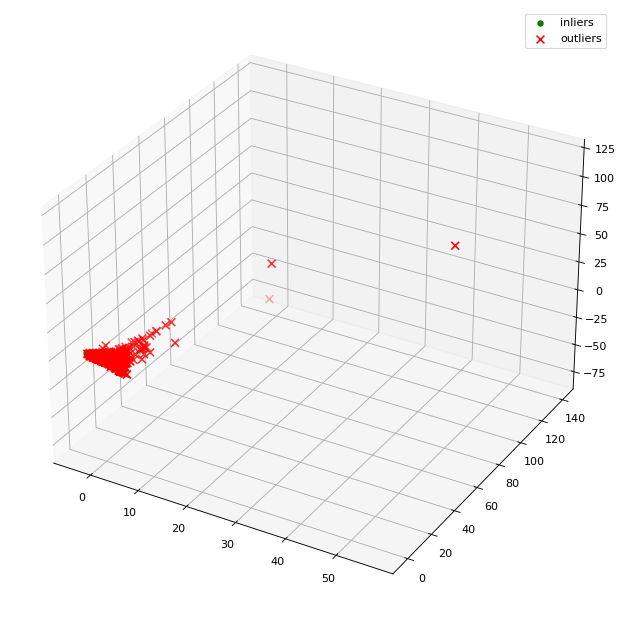

In [16]:
#X_sample = X.sample(n=10000, random_state=42)


pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#X_norm = scaler.fit_transform(X[to_model_cols])

X_reduce = pca.fit_transform(X[to_model_cols])

fig = plt.figure(figsize=(10,10), dpi=80)
ax = fig.add_subplot(111, projection='3d')

# Plot the compressed data points
ax.scatter(X_reduce[inlier_index, 0], X_reduce[inlier_index, 1], zs=X_reduce[inlier_index, 2], 
           s=14, lw=2, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=10, s=1, marker="x", c="red", label="outliers")

ax.legend()
plt.show()

# 2. LocalOutlierFactor

In [ ]:
X.drop(columns=['anomaly'], inplace=True)

In [ ]:
lof = LocalOutlierFactor(n_neighbors=3)

to_model_cols = X.columns[2:]


pred = lof.fit_predict(X[to_model_cols])

X['anomaly'] = pred

outliers = X.loc[X['anomaly'] == -1]
inliers = X.loc[X['anomaly'] == 1]

outlier_index = list(outliers.index)
inlier_index = list(inliers.index)

print(X['anomaly'].value_counts())

In [ ]:
anomalies = user_df.loc[X.loc[X['anomaly'] == -1].index]
non_anomalies = user_df.loc[X.loc[X['anomaly'] == 1].index]


print(len(anomalies[anomalies['is_bot'] == True]))
print(len(non_anomalies[non_anomalies['is_bot'] == True]))